In [1]:
# Intro to Project - EDA (exploratory data analysis)

import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt
import ast
import matplotlib.pyplot as plt
import seaborn as sns
# load data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# filter for DA
#df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df.head()

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [2]:
# US data analyst roles 

df_US_DA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]
df_US_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


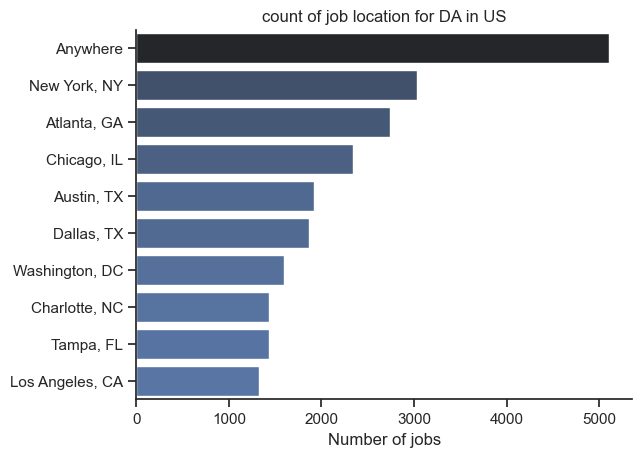

In [13]:
# top 10 location for DA jobs 

df_loc = df_US_DA['job_location'].value_counts().head(10).to_frame()   # turns into dataframe 
df_loc
# using seaborn to plot barh

sns.set_theme(style = 'ticks')
sns.barplot(data = df_loc, x = 'count', y = 'job_location', hue = 'count', palette= 'dark:b_r', legend = False ) 
# _r is to reverse bar from high to low      # hue - color bar as per intensity of data (low to high or high to low values)

sns.despine() # to remove border from the graph
plt.title('count of job location for DA in US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

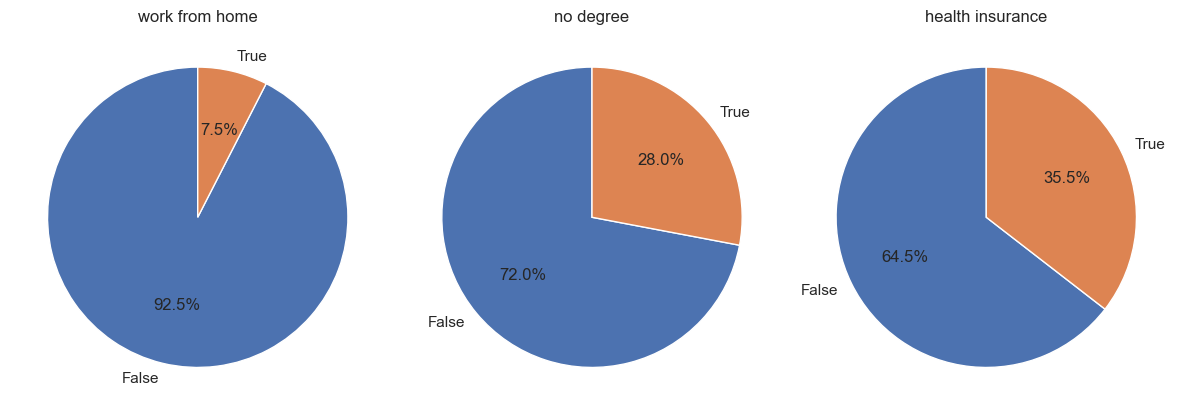

In [14]:
# Pie plot for all boolean values in dataset 

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

dict_column = {
    'job_work_from_home' : 'work from home',
    "job_no_degree_mention" : "no degree",
    "job_health_insurance" : "health insurance"
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_US_DA[column].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = ['False', 'True'])
    ax[i].set_title(title)

    fig.tight_layout()

plt.show()

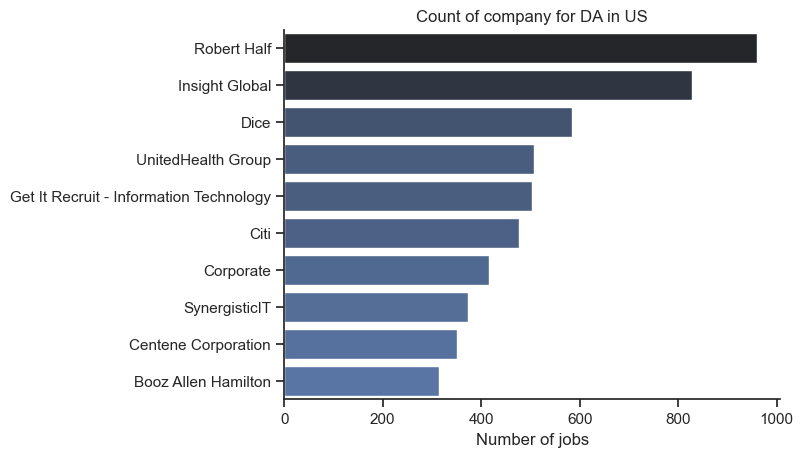

In [18]:
# Number of jobs by Company name 

df_name = df_US_DA['company_name'].value_counts().head(10).to_frame()   # turns into dataframe 
df_name
# using seaborn to plot barh

sns.set_theme(style = 'ticks')
sns.barplot(data = df_name, x = 'count', y = 'company_name', hue = 'count', palette= 'dark:b_r', legend = False ) 
# _r is to reverse bar from high to low      # hue - color bar as per intensity of data (low to high or high to low values)

sns.despine() # to remove border from the graph
plt.title('Count of company for DA in US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

# Command + shift + L - edit all the places which are same together 